In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\Play Store Data.csv')

## Data Overview

In [4]:
print(df.shape)
df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Except "Rating" all other features are Object data type.
We will convert "Reviews, Size, Installs and Price" into numerical Dtype.

In [7]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

"Rating" column has 1474 null values

In [9]:
df['App'].duplicated().sum()

1181

1181 Apps are duplicated entries in the dataset

## Data Cleaning

In [16]:
# Removing Duplicates of App

In [10]:
df['App'].duplicated().value_counts()

False    9660
True     1181
Name: App, dtype: int64

1181 Apps are found to be duplicates.

In [12]:
df.loc[df['App'].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [13]:
#Dropping the duplicates
df = df.drop_duplicates('App')

In [14]:
df.shape

(9660, 13)

In [15]:
#Finding null values
df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [18]:
#Dropping the null values would result in loss of ~10% data
#To minimize data loss we will fill the null values under "Rating" column by mean through category wise.

In [17]:
df['Rating'].fillna(df.groupby('Category')['Rating'].transform('mean'),inplace=True)

In [19]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [24]:
df.dropna(inplace=True) #dropping the other null rows

In [26]:
#Converting Install coloumn to int type
df['Installs']=df['Installs'].apply(lambda x:x.replace('+',''))
df['Installs']=df['Installs'].apply(lambda x:x.replace(',',''))
df['Installs']=df['Installs'].astype(int)

In [27]:
df['Size'].unique() #Unique values in Size coloumn

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [28]:
#Converting the Size coloumn into float type and in Megabytes format
#Replacing the string "Varies with device" into NaN value which can be later filled by mean category wise

df['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [29]:
df['Size']=df['Size'].apply(lambda x:str(x).replace('M',''))
df['Size']=df['Size'].apply(lambda x:str(x).replace('k','e-3')) #replacing k(kilobytes) into Megabytes format

In [30]:
df['Size']=df['Size'].astype(float) #converting into float 

In [31]:
#To convert object into numerical data type
df['Price']=df['Price'].apply(lambda x:x.replace('$',''))

In [33]:
df['Price']=df['Price'].astype(float)

In [34]:
df['Reviews']=df['Reviews'].astype(int) #Converting reviews coloumn into int type

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int32  
 4   Size            8422 non-null   float64
 5   Installs        9648 non-null   int32  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 979.9+ KB


## Data Visualization

### Content Rating

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64


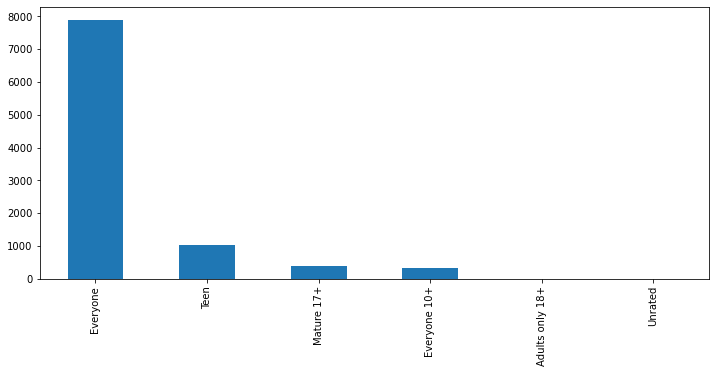

In [60]:
#Finding the "Content Rating"
plt.figure(figsize=(12,5))
df['Content Rating'].value_counts().plot(kind='bar')
print(df['Content Rating'].value_counts())


Most of the Apps are rated "Everyone". Few apps in "Adults only 18+" and "Unrated"

### Categories

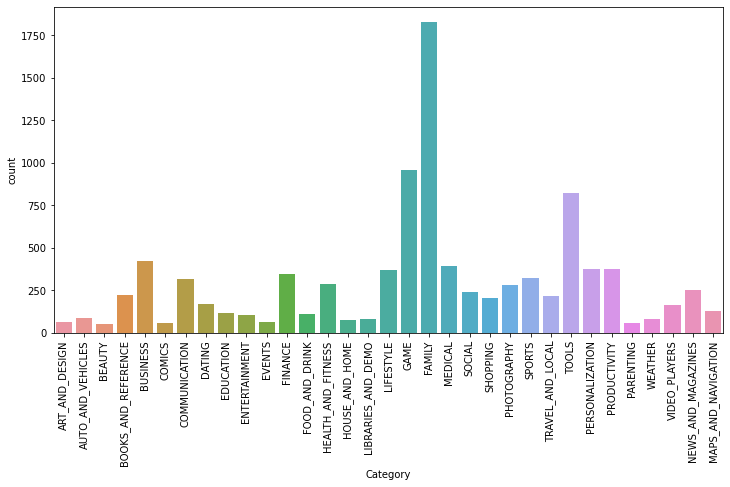

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

Majority of the apps are in Family category

### Categories

<AxesSubplot:xlabel='Category', ylabel='count'>

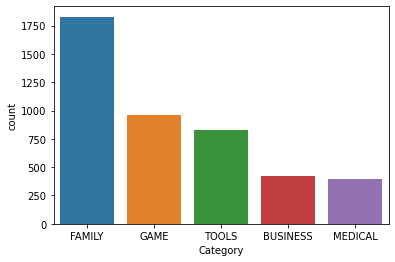

In [64]:
sns.countplot(x=df['Category'],order=pd.value_counts(df['Category']).iloc[:5].index)

Top 5 Categories are :
1. Family
2. Game
3. Tools
4. Business
5. Medical

### Type

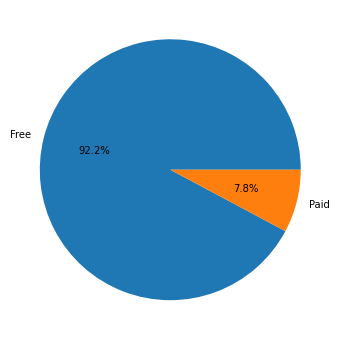

In [177]:
labels =df['Type'].value_counts(sort = True).index
plt.figure(figsize=(6,6))
plt.pie(df['Type'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.show()

Most of the apps listed in the PlayStore are Free

### Rating

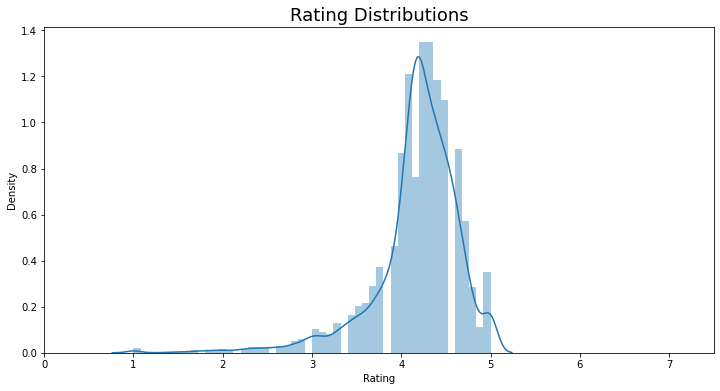

In [102]:
#Rating distribution
plt.figure(figsize=(12,6))
plt.title('Rating Distributions',size = 18)
sns.distplot(df['Rating'])
plt.xlim(0,7.5)
plt.show()

Most of the apps are rated around 4 to 4.5

### Genres

In [71]:
df['Genres'].nunique()

118

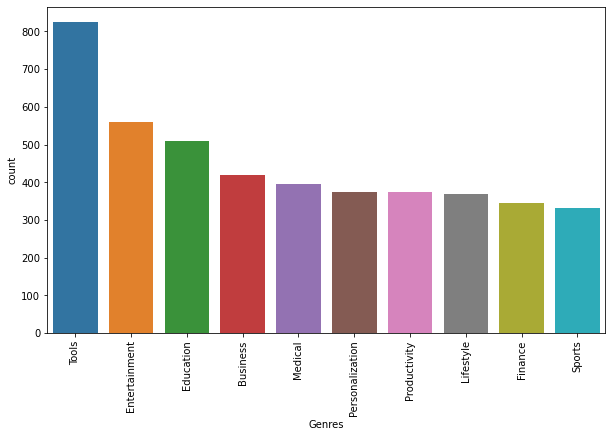

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Genres'],order=pd.value_counts(df['Genres']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

Out of 118 genres the most frequent are Tools, Entertainment, Education

### Android Version

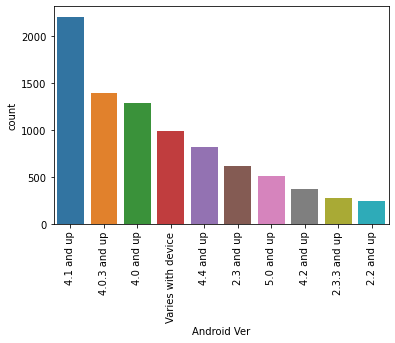

In [95]:
#Android version compatibility
sns.countplot(df['Android Ver'],order=pd.value_counts(df['Android Ver']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

Most of the apps are made compatible with Android version 4.1(Jellybean) and above

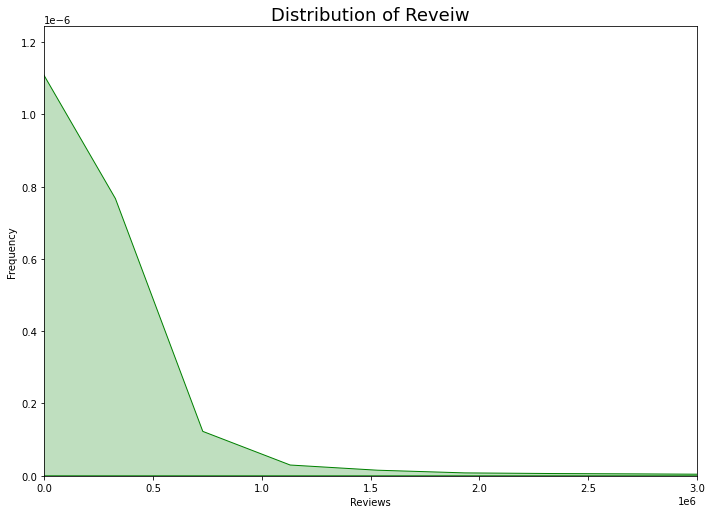

In [163]:
plt.figure(figsize=(11.7,8.27))
sns.kdeplot(df.Reviews, color="Green", shade = True)
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 18)
plt.xlim(0,0.3e7)
plt.show()

Most of the apps in the store have less than 1M in reviews

### Rating VS Review

In [141]:
px.scatter(
    df, x='Reviews', y='Rating', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue',width=600, height=450
)

Generally, higher rated apps have high number of review count

<AxesSubplot:>

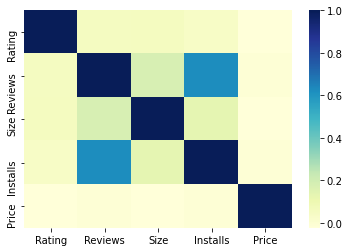

In [192]:
sns.heatmap(df.corr(),cmap="YlGnBu")

In [189]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055112,0.059193,0.040254,-0.019691
Reviews,0.055112,1.000000,0.179276,0.625158,-0.007604
Size,0.059193,0.179276,1.000000,0.134215,-0.022492
Installs,0.040254,0.625158,0.134215,1.000000,-0.009413
Price,-0.019691,-0.007604,-0.022492,-0.009413,1.000000


## Top Categories based on Installs(having 1bill+ downloads)

In [ ]:
most_installs=df[df['Installs']==1000000000]

In [ ]:
most_installs['Category'].value_counts().plot(kind='bar')

Communication apps are noted to be most frequent when it comes to installs

## Top 5 Categories based on Rating

In [ ]:
category_grp = df.groupby(['Category'])

In [ ]:
category_grp['Rating'].mean()

In [ ]:
category_grp['Rating'].mean().sort_values(ascending=False).iloc[:5]

### Top 5 Categories based on Ratings are:
1. Events
2. Education
3. Art and Design
4. Books and Reference
5. Personalization

### Top 5 Categories based on App Rating and having 1,00,000+ installs

In [ ]:
apps_with_10k = df[df['Installs']>=10000]

In [ ]:
category_grp10k = apps_with_10k.groupby(['Category'])

In [ ]:
category_grp10k['Rating'].mean().sort_values(ascending=False).iloc[:6]

In [ ]:
df[df['Category']=='EVENTS']

In [ ]:
#Least Rated Category
category_grp10k['Rating'].mean().sort_values(ascending=False).iloc[-1:]

In [ ]:
# Dating category is rated the least

## Top 5 Genres based on Ratings

In [ ]:
gen_grp = df.groupby(['Genres'])

In [ ]:
gen_grp['Rating'].mean().sort_values(ascending=False).iloc[:5]

In [ ]:
cat_gen=df.groupby(['Category','Genres'])

In [ ]:
cat_gen['Rating'].mean().sort_values(ascending=False).iloc[:20]

## Top 3 Apps in Paid and Free

In [ ]:
df.head(2)

In [ ]:
paid_10k_apps = apps_with_10k[apps_with_10k['Type']=='Paid']

In [ ]:
sns.boxplot(paid_10k_apps['Price'])

In [ ]:
paid_10k_apps['Price'].value_counts().plot(kind='bar')

In [ ]:
sns.kdeplot(paid_10k_apps['Price'])
plt.xlim(0,50)

In [ ]:
paid_10k_apps['Price'].value_counts(normalize=True).iloc[:5]

In [ ]:
#~25% paid apps are priced 2.99$

In [ ]:
paid_10k_apps['Installs'].unique()

In [ ]:
paid_10k_apps[paid_10k_apps['Installs']==10000000]

In [ ]:
paid_10k_apps.duplicated()

In [ ]:
paid_10k_apps.loc[290]

In [ ]:
paid_10k_apps.loc[291]

In [ ]:
paid_10k_apps[paid_10k_apps['App']=='Tiny Scanner Pro: PDF Doc Scan']

In [ ]:
paid_10k_apps['App'].duplicated

In [ ]:
df['App'].duplicated().value_counts()

In [ ]:
df1 = df.drop_duplicates('App')

In [ ]:
df1.shape

In [ ]:
appswith10k = df1[df1['Installs']>=10000]

In [ ]:
paid10kapps = appswith10k[appswith10k['Type']=='Paid']

In [ ]:
paid10kapps[paid10kapps['Installs']==10000000]

In [ ]:
df.loc[df['App'].duplicated(), :]

In [ ]:
df[df['App']=='Slickdeals: Coupons & Shopping']

In [ ]:
new_df = pd.read_csv(r'C:\Users\Syed Azeemuddin\Downloads\sem7 notes\HT\datasets\Play Store Data.csv')